# Homework 0

In [1]:
import numpy as np
from PIL import Image
import math
from skimage import color
from skimage import io

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

/home/sara/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Image Manipulation 

In [34]:
image1_path = 'data/flower1.jpg'
image2_path = 'data/flower2.jpg'

## Question 2.1 (5 points)

In [35]:
def display(img):
    # Show image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [36]:
def load(image_path):
    """ Loads an image from a file path

    Args:
        image_path: file path to the image

    Returns:
        out: numpy array of shape(image_height, image_width, 3)
    """
    out = None

    ### YOUR CODE HERE
    # Use skimage io.imread
    out = io.imread(image_path)
    ### END YOUR CODE

    return out

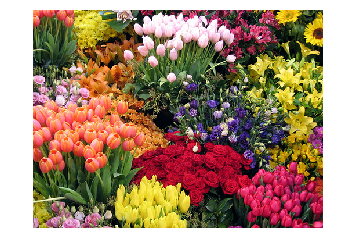

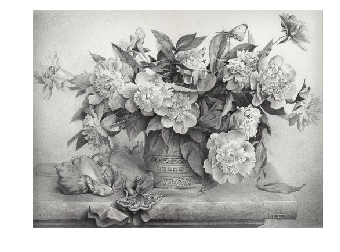

In [37]:
image1 = load(image1_path)
image2 = load(image2_path)

display(image1)
display(image2)

In [38]:
image1.shape, image2.shape

((375, 500, 3), (375, 500, 3))

## Question 2.2 (10 points)
Implement the change_value method by converting images according to  $x_n = 0.5*x_p^2$ for every pixel, where $x_n$ is the new value and $x_p$ is the original value.

In [44]:
def change_value(image):
    """ Change the value of every pixel by following x_n = 0.5*x_p^2 
        where x_n is the new value and x_p is the original value

    Args:
        image: numpy array of shape(image_height, image_width, 3)

    Returns:
        out: numpy array of shape(image_height, image_width, 3)
    """

    out = None

    ### YOUR CODE HERE
#     out = 0.5 * image**2
    out = 0.5 * np.square(image)
    ### END YOUR CODE

    return out

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


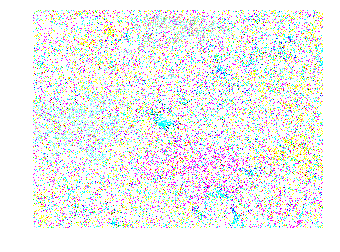

In [45]:
new_image = change_value(image1)
display(new_image)

## Question 2.3 (10 points)
Implement the convert_to_grey_scale method and convert the image into grey scale.

In [46]:
def convert_to_grey_scale(image):
    """ Change image to gray scale

    Args:
        image: numpy array of shape(image_height, image_width, 3)

    Returns:
        out: numpy array of shape(image_height, image_width, 3)
    """
    out = None

    ### YOUR CODE HERE
    out = color.rgb2grey(image)
    ### END YOUR CODE

    return out

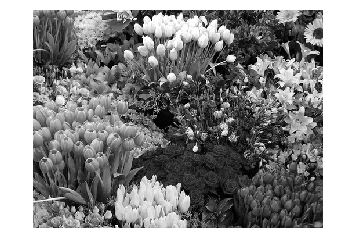

In [47]:
grey_image = convert_to_grey_scale(image1)
display(grey_image)

In [48]:
grey_image.shape

(375, 500)

## Question 2.4 (10 points)
Implement the rgb_decomposition, in which the input image is decomposed into the three channels: R, G and B and return the image excluding the specified channel. 

In [49]:
def rgb_decomposition(image, channel):
    """ Return image **excluding** the rgb channel specified

    Args:
        image: numpy array of shape(image_height, image_width, 3)
        channel: str specifying the channel

    Returns:
        out: numpy array of shape(image_height, image_width, 3)
    """

    out = None

    ### YOUR CODE HERE
    c = 'RGB'
    out = image.copy()
    out[:, :, c.index(channel)] = 0
    ### END YOUR CODE

    return out

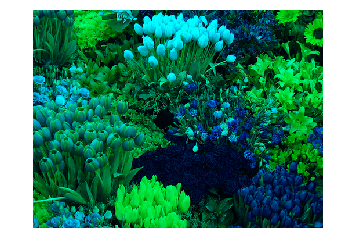

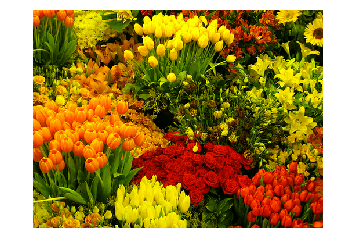

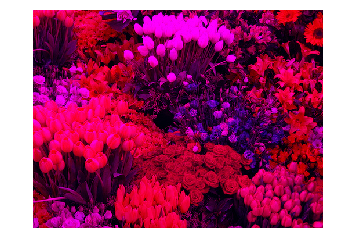

In [50]:
without_red = rgb_decomposition(image1, 'R')
without_blue = rgb_decomposition(image1, 'B')
without_green = rgb_decomposition(image1, 'G')

display(without_red)
display(without_blue)
display(without_green)

In [51]:
without_red.shape

(375, 500, 3)

## Question 2.5 (10 points)
Implement the lab_decomposition, in which the input image is decomposed into the three channels: L, A and B and return the values for the specified channel. 

In [52]:
def lab_decomposition(image, channel):
    """ Return image decomposed to just the lab channel specified

    Args:
        image: numpy array of shape(image_height, image_width, 3)
        channel: str specifying the channel

    Returns:
        out: numpy array of shape(image_height, image_width, 3)
    """

    lab = color.rgb2lab(image)
    out = None

    ### YOUR CODE HERE
    c = 'LAB'
    out = image[:, :, c.index(channel)].copy()
    ### END YOUR CODE

    return out

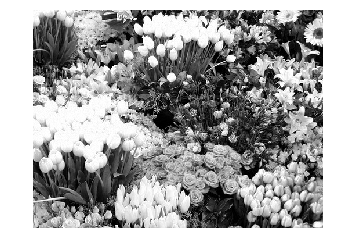

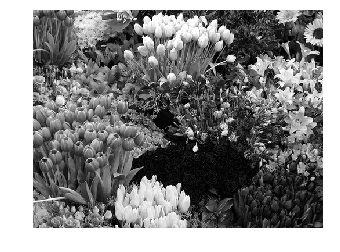

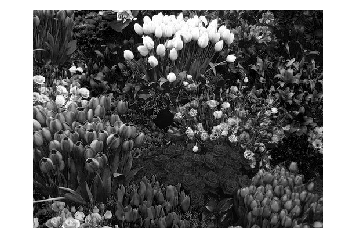

In [53]:
image_l = lab_decomposition(image1, 'L')
image_a = lab_decomposition(image1, 'A')
image_b = lab_decomposition(image1, 'B')

display(image_l)
display(image_a)
display(image_b)

## Question 2.6 (10 points)
Implement the hsv_decomposition, in which the input image is decomposed into the three channels: H, S and V and return the values for the specified channel. 

In [54]:
def hsv_decomposition(image, channel='H'):
    """ Return image decomposed to just the hsv channel specified

    Args:
        image: numpy array of shape(image_height, image_width, 3)
        channel: str specifying the channel

    Returns:
        out: numpy array of shape(image_height, image_width, 3)
    """

    hsv = color.rgb2hsv(image)
    out = None

    ### YOUR CODE HERE
    c = 'HSV'
    out = image[:, :, c.index(channel)].copy()
    ### END YOUR CODE

    return out

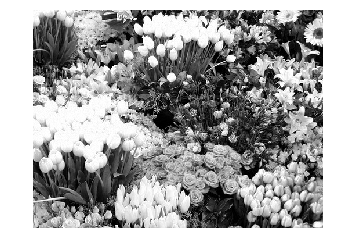

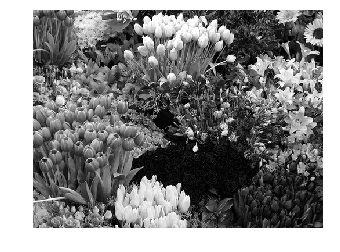

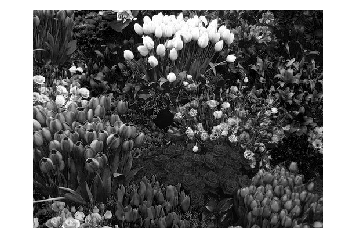

In [55]:
image_h = hsv_decomposition(image1, 'H')
image_s = hsv_decomposition(image1, 'S')
image_v = hsv_decomposition(image1, 'V')

display(image_h)
display(image_s)
display(image_v)

## Question 2.7 (10 points)
In mix_images method, create a new image such that the left half of the image is the left half of image1 and the
right half of the image is the right half of image2. If the channels are specified, exclude the specified channel for the given image. 

In [56]:
def mix_images(image1, image2, channel1, channel2):
    """ Return image which is the left of image1 and right of image 2 excluding
    the specified channels for each image

    Args:
        image1: numpy array of shape(image_height, image_width, 3)
        image2: numpy array of shape(image_height, image_width, 3)
        channel1: str specifying channel used for image1
        channel2: str specifying channel used for image2

    Returns:
        out: numpy array of shape(image_height, image_width, 3)
    """

    out = None
    ### YOUR CODE HERE
    h, w, c = image1.shape
    out = np.concatenate((image1[:, :w//2, :], image2[:, w//2:, :]), axis=1)
    c = 'RGB'
    out[:, :w//2, c.index(channel1)] = 0
    out[:, w//2:, c.index(channel2)] = 0
    ### END YOUR CODE

    return out

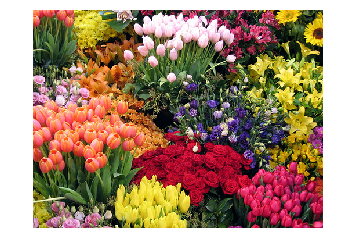

In [57]:
display(image1)


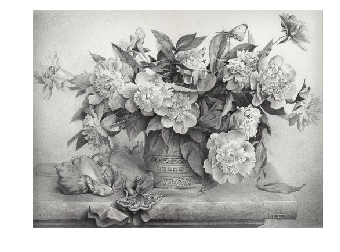

In [58]:
display(image2)

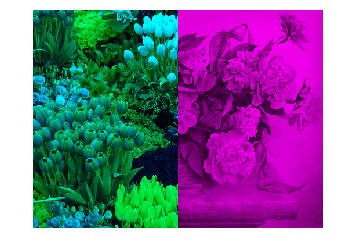

In [59]:
image_mixed = mix_images(image1, image2, channel1='R', channel2='G')
display(image_mixed)